In [38]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns # Eu não havia realizado a importação antes e estava dando muitos erros.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [39]:
N = 1000
centers = [[-0.5, 0], [0, 1.5]]
X, y = make_blobs(n_samples=N, centers=centers, random_state=42)

# Esta construção também estava faltando em meu exercício inicial
x1 = X[:,0]
x2 = X[:,1] 

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

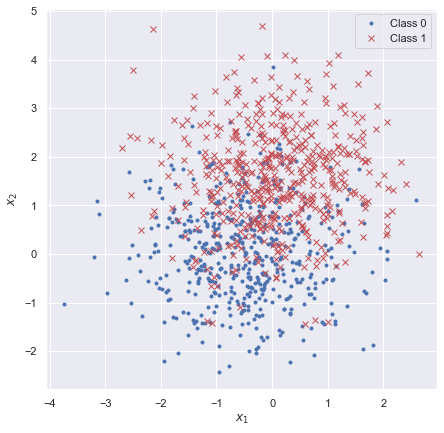

In [41]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
fig = plt.figure(figsize=(7,7))
plt.plot(x[idx0,0], x[idx0,1], '.', label='Class 0')
plt.plot(x[idx1,0], x[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.savefig('noise_or_function.png', dpi=600)
plt.show()

In [42]:
sgd = SGDClassifier(loss='perceptron', learning_rate='constant', eta0=1, penalty=None, random_state=42)
sgd.fit(X, y)

print('weights: ',sgd.coef_[0])
print('bias: ',sgd.intercept_)

weights:  [0.11510462 2.3965023 ]
bias:  [-1.]


In [43]:
y_pred = sgd.predict(X)
        
error = mean_squared_error(y_pred, y)
print('MSE: ', error)

MSE:  0.238


In [44]:
accuracy = accuracy_score(y, y_pred)

print('accuracy: ',accuracy)

accuracy:  0.762


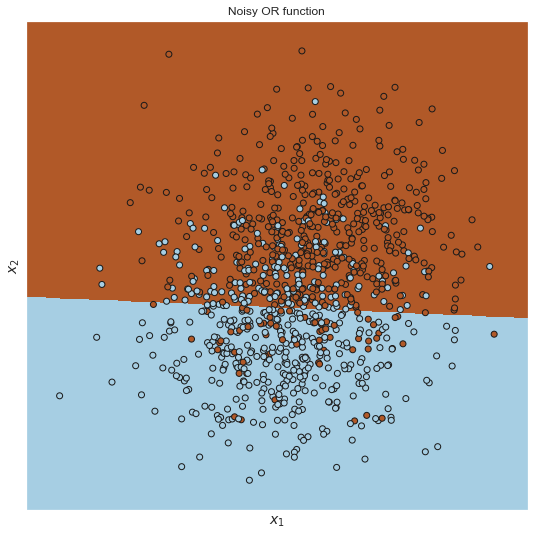

In [45]:
x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Z = clf.predict(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()])
Z = sgd.predict(np.c_[ xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(9, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x1, x2, c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Noisy OR function')
plt.savefig('noise_or_functionDB.png', dpi=600)
plt.show()

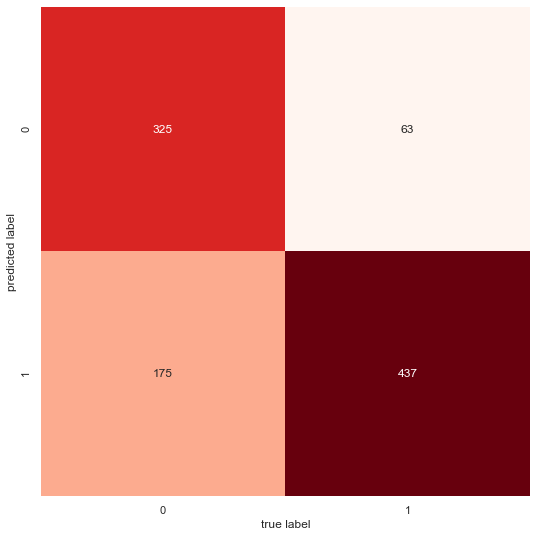

In [46]:
fig = plt.figure(figsize=(9,9))
mat = confusion_matrix(y, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Reds")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('Confusion_Matrix.png', dpi=600)
plt.show()

In [47]:
# Instantiate LogisticRegression object.
lr = LogisticRegression(solver='lbfgs', random_state=42)
# Train model.
lr.fit(X, y)

print('weights: ',lr.coef_[0])
print('bias: ',lr.intercept_)
print('n_iter: ',lr.n_iter_)

weights:  [0.56956334 1.45003618]
bias:  [-1.03213818]
n_iter:  [10]


In [48]:
y_pred = lr.predict(X)
        
error = mean_squared_error(y_pred, y)
print('MSE: ', error)

MSE:  0.203


In [49]:
# Calculate and return the accuracy on the test data 
accuracy = accuracy_score(y, y_pred)

print('accuracy: ',accuracy)

accuracy:  0.797


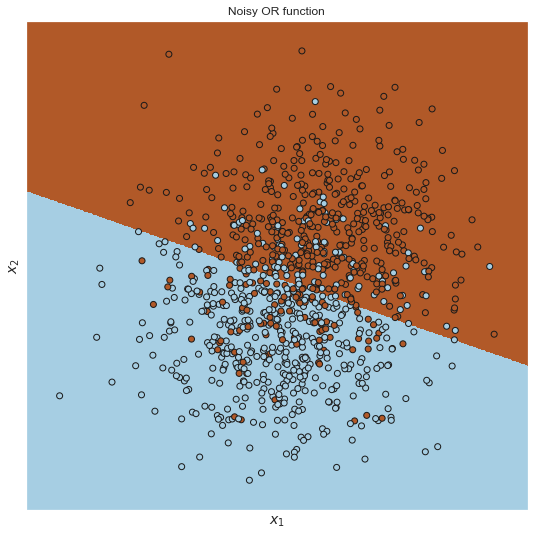

In [51]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Z = lr.predict(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()])
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(9, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x1, x2, c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title('Noisy OR function')
plt.show()

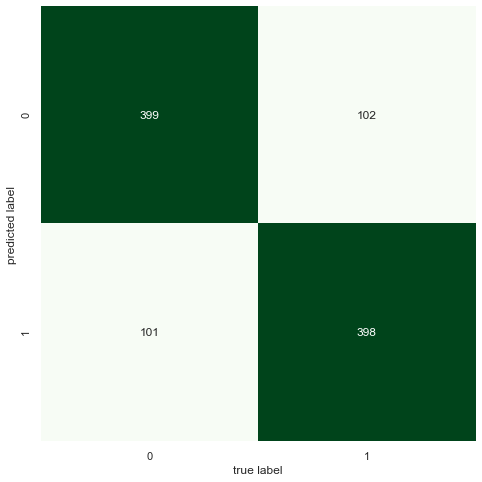

In [53]:
# Plot the confusion matrix
fig = plt.figure(figsize=(8,8))
mat = confusion_matrix(y, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Greens")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

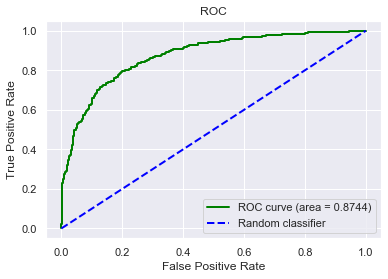

In [56]:
# Getting the probabilities for each class.
y_prob = lr.predict_proba(X)
# Calculating ROC curve and ROC AUC.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_prob[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
# Plotting ROC curve.
lw = 2
plt.plot(false_positive_rate, true_positive_rate, color='green', lw=lw, label='ROC curve (area = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('ROC.png', dpi=600)
plt.show()